# Part 2

**1. Import the necessary libraries then import your most up-to-date project data.**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# Create path to Instacart Basket Analysis folder
path = r'/Users/mitchellkubik/Desktop/08-2023 Instacart Basket Analysis'

In [3]:
# Import cust_ords_prods_merge from 4.9 Part 1
cust_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 Data Visualization with Python', 'cust_ords_prods_merge.pkl'))

**2. Follow the instructions in the Exercise to create a bar chart, histogram, scatter plot, and line chart, using a sample subset for the line chart.**

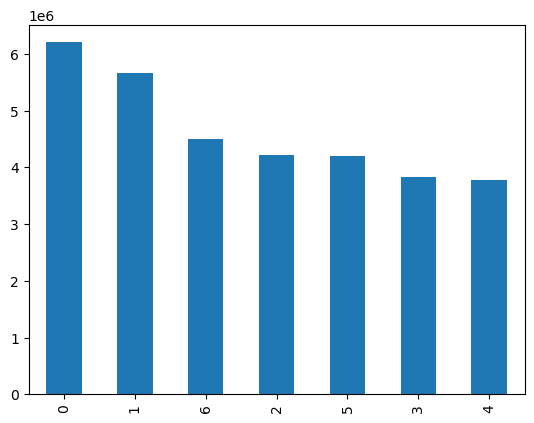

In [4]:
# Bar Chart
bar_chart = cust_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

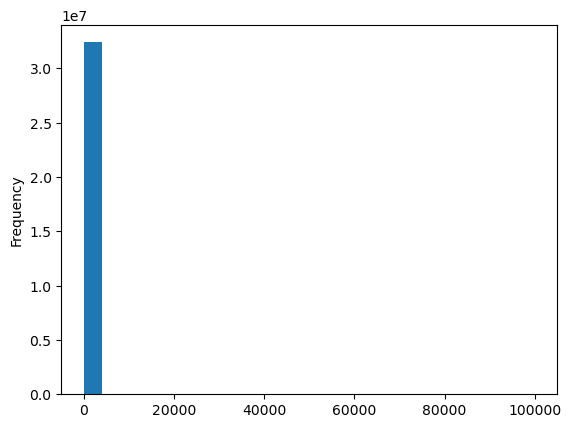

In [5]:
# Histogram
hist = cust_ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

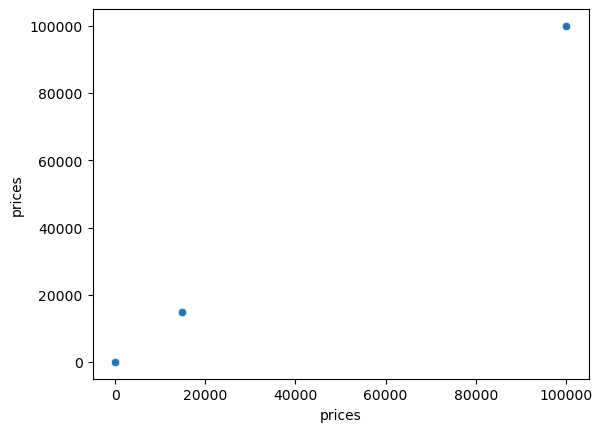

In [6]:
# Create scatterplot to identify price outliers
sns.scatterplot(x = 'prices', y = 'prices', data = cust_ords_prods_merge)

In [7]:
cust_ords_prods_merge.loc[cust_ords_prods_merge['prices'] > 500]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent Customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent Customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent Customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent Customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular Customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular Customer,omitted,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular Customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-Frequent Customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent Customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [8]:
cust_ords_prods_merge.loc[cust_ords_prods_merge['prices'] > 500, 'prices'] = np.nan

In [9]:
cust_ords_prods_merge['prices'].max()

25.0

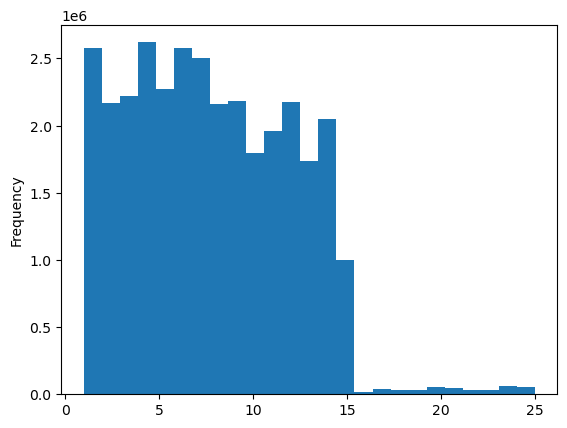

In [10]:
hist = cust_ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
# Line Chart

np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods_merge)) <= 0.7

In [12]:
big = cust_ords_prods_merge[dev]

In [13]:
small = cust_ords_prods_merge[~dev]

In [14]:
len(cust_ords_prods_merge)

32404859

In [15]:
len(big) + len(small)

32404859

In [16]:
df_2 = small[['orders_day_of_week', 'prices']]

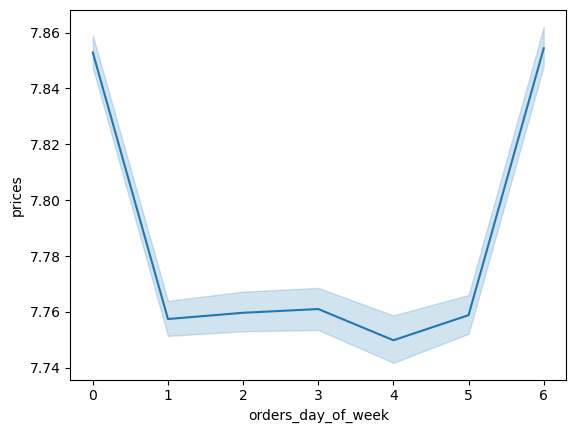

In [17]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

**3. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the "order_hour_of_day column" column.**

Text(0, 0.5, 'Frequency')

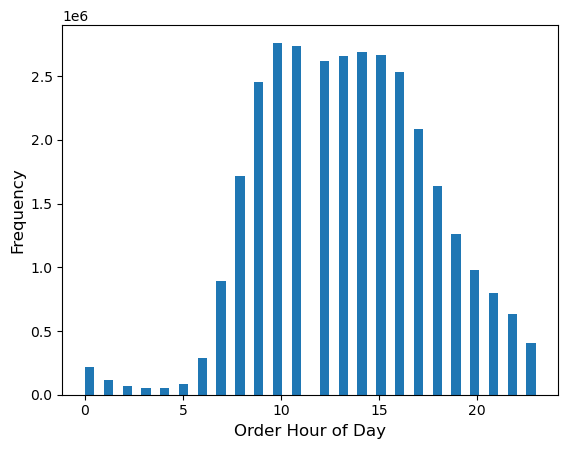

In [40]:
hist = cust_ords_prods_merge['order_hour_of_day'].plot.hist(bins = 48)
plt.xlabel("Order Hour of Day", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

**INSIGHTS**

Most orders are done between 8:00AM and 6:00PM

**4. Create a bar chart from the loyalty flag column.**

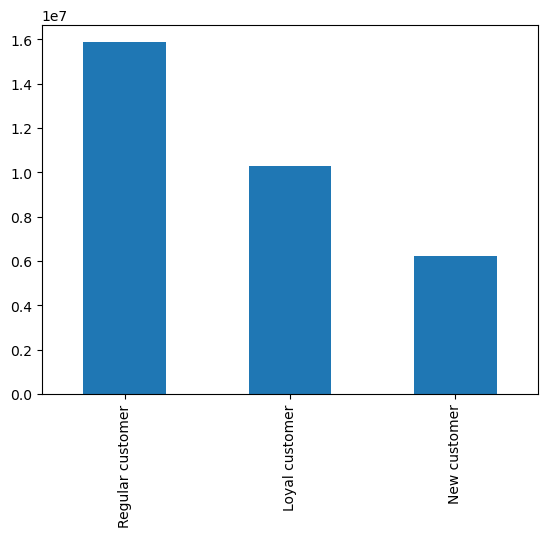

In [23]:
loyalty_chart = cust_ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

In [25]:
#Export
loyalty_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_Chart.png'))

**5. Check whether there's a difference in expenditure depending on the hour of the day.**

In [27]:
# Create random sample
np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods_merge)) <= 0.7

In [28]:
big = cust_ords_prods_merge[dev]
small = cust_ords_prods_merge[~dev]

In [29]:
len(cust_ords_prods_merge)

32404859

In [30]:
len(big)+len(small)

32404859

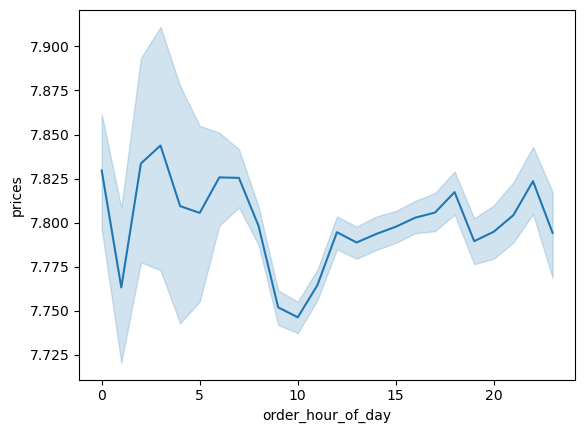

In [31]:
expenditure_line = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices')

In [32]:
#Export
expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expenditure_time_of_day_line.png'))

**6. Determine whether there's a connection between age and family situation by creating a line chart exploring the connection between age and number of dependents.**

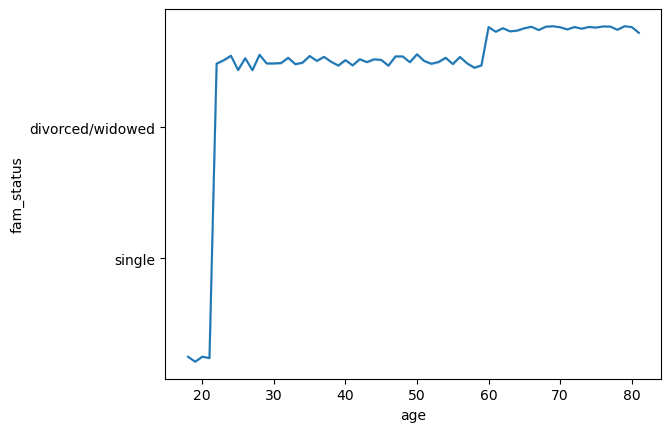

In [33]:
age_family_line = sns.lineplot(data = small, x = 'age', y = 'fam_status')

**INSIGHTS**

We see that people over the age of 20 are more likely to have dependents or have had dependents at one time.

In [35]:
# Export

age_family_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_FamStat_Connection.png'))

**7. Explore whether there's a connection between age and income.**

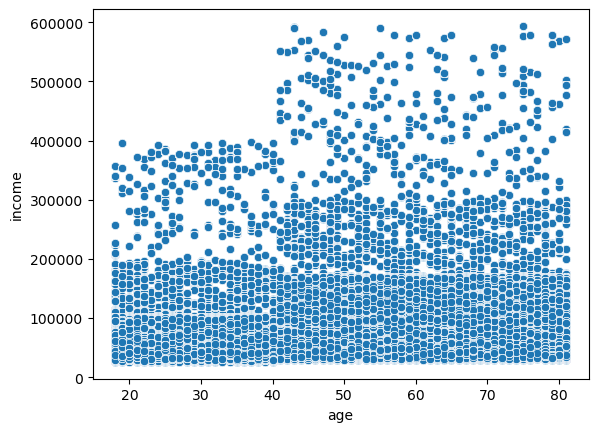

In [36]:
age_income_plot = sns.scatterplot(x = 'age', y = 'income', data = small)

**INSIGHTS**

We can see that customers over the age of 40 begin to have higher salaries on average than younger people.

In [38]:
# Export
age_income_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_Income_Plot.png'))